<a href="https://colab.research.google.com/github/mondragonda/notebooks/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib pip install scipy pip install sklearn

Centroids scratch:  [[0.48754955 0.79980694]
 [0.23126821 0.31616352]
 [0.7684381  0.32116681]]



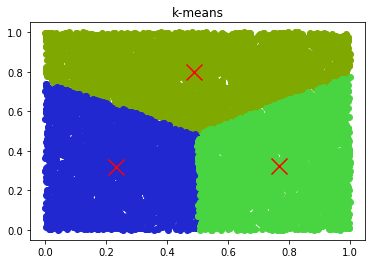


Centroids scipy:  [[0.4487731  0.79683908]
 [0.24849957 0.28683099]
 [0.78225793 0.35627221]]



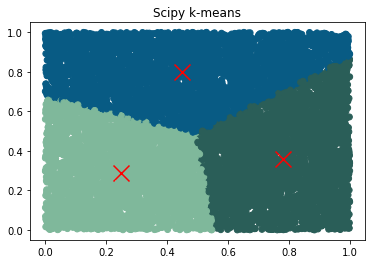


Centroids scikit-learn:  [[0.44728987 0.79708736]
 [0.24901258 0.28638289]
 [0.78257131 0.35805772]]



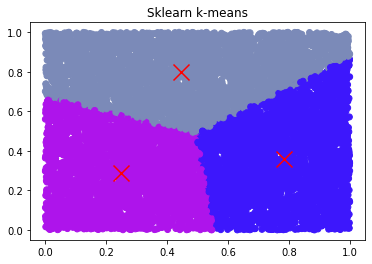

In [391]:
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.colors as colors
from math import sqrt

data_points = np.random.random_sample((10000, 2))
initial_centroids = data_points.take(np.random.randint(0, data_points.shape[0], 3), 0)

def get_colors(centroids):
  return np.array([[np.random.sample(), np.random.sample(), np.random.sample()] for centroid in range(centroids.shape[0])])

def plot_centroids(title, centroids, labels):
  colors = get_colors(centroids)
  pyplot.scatter(data_points[:,0], data_points[:,1], c=colors[labels])
  pyplot.scatter(centroids[:,0], centroids[:,1], marker='x', s=256, c="red")
  pyplot.title(title)
  pyplot.show()

def k_means():
  centroids = initial_centroids.copy()
  last_centroids = None
  clusters = None
  n_iter = 0
  while True:
    n_iter += 1
    clusters = [[] for centroid in initial_centroids]
    for data_point in data_points:
      min_distance = None
      for centroid in range(centroids.shape[0]):
        centroid_point_distance = sqrt((data_point[0] - centroids[centroid][0])**2 + (data_point[1] - centroids[centroid][1])**2)
        if not min_distance or centroid_point_distance < min_distance['value']:
         min_distance = {} 
         min_distance['centroid_index'] = centroid
         min_distance['value'] = centroid_point_distance
      clusters[min_distance['centroid_index']].append(data_point)
    last_centroids = centroids.copy() 
    for centroid in range(centroids.shape[0]):
      if len(clusters[centroid]) > 0:
        centroid_mean = np.array(clusters[centroid]).mean(axis=0)
        centroids[centroid] = centroid_mean
    if np.array_equal(last_centroids, centroids):
      print('Centroids scratch: ', centroids)
      print()
      colors = get_colors(centroids)
      for cluster in range(len(clusters)):
        cluster_np = np.array(clusters[cluster])
        if cluster_np.size > 0:
          pyplot.scatter(cluster_np[:,0], cluster_np[:,1], c=[colors[cluster]])
      pyplot.scatter(centroids[:,0], centroids[:,1], marker='x', s=256, c="red")
      pyplot.title('k-means')
      pyplot.show()
      break

from scipy.cluster.vq import vq, kmeans2

def k_means_scipy():
  centroids = initial_centroids.copy()
  codebook = kmeans2(data_points, centroids)
  result, labels = codebook
  print('Centroids scipy: ', result)
  print()
  plot_centroids('Scipy k-means', result, labels)

from sklearn.cluster import KMeans

def k_means_scikit_learn():
  centroids = initial_centroids.copy()
  kmeans = KMeans(centroids.shape[0], init=centroids, n_init=1).fit(data_points)
  print('Centroids scikit-learn: ', kmeans.cluster_centers_)
  print()
  plot_centroids('Sklearn k-means', kmeans.cluster_centers_, kmeans.labels_)

k_means()
print()
k_means_scipy()
print()
k_means_scikit_learn()


